In [1]:
# Load some test data
import pandas as pd
dat = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [2]:
dat.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Import the libraries we need
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [4]:
# Get our target variable and features and split them into test and train datasets

X = dat.drop(['price', 'id', 'date', 'lat', 'long'], axis=1)
y = dat['price']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25)

In [5]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
history = model.fit(X_train, y_train)

In [6]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([ 311815.5 ,  529546.7 ,  831757.44, ...,  510609.88,  579814.25,
       1242010.8 ], dtype=float32)

In [7]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import mean_squared_error

result = mean_squared_error(y_test, predictions, squared=False)
result

# Looks like we're off by just 4.5 dat on average
# Not bad for a quick run with no real preprocessing

152676.72915807154

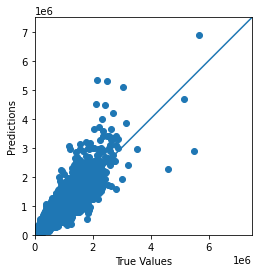

In [8]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_predictions, y_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 7500000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Now for more complex stuff

In [9]:
from sklearn.metrics import r2_score
r2_score(predictions, y_test)

0.7852861307872909

### Making value_counts() sorted by price

In [10]:
dat_high = dat[dat.price > 4000000]
dat_high.head()
dat_low = dat[dat.price < 4000000]
pd.set_option('display.max_rows', 5000)
print(dat.price.max() - dat.price.min())
dat.price.value_counts().sort_index()

7625000.0


75000.0        1
78000.0        1
80000.0        1
81000.0        1
82000.0        1
82500.0        1
83000.0        1
84000.0        1
85000.0        2
86500.0        1
89000.0        1
89950.0        1
90000.0        5
92000.0        1
95000.0        4
96500.0        1
99000.0        1
100000.0       6
102500.0       1
104950.0       1
105000.0       2
105500.0       1
106000.0       1
107000.0       2
109000.0       1
109500.0       1
110000.0       8
110700.0       1
111300.0       1
112000.0       1
114000.0       1
114975.0       1
115000.0       7
118000.0       1
118125.0       1
119500.0       1
119900.0       1
120000.0       3
120750.0       1
121800.0       1
122000.0       4
123000.0       1
123300.0       1
124000.0       2
124500.0       1
124740.0       1
125000.0       5
126000.0       1
126500.0       1
128000.0       3
128750.0       1
129000.0       3
129888.0       1
130000.0       8
132500.0       2
132825.0       1
133000.0       2
133400.0       1
134000.0      

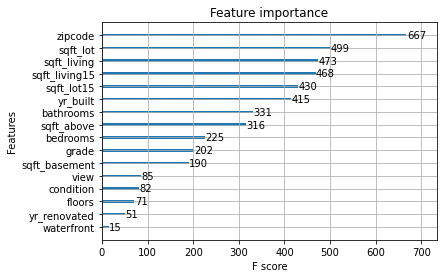

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

In [12]:
print(model.feature_importances_)
print(model.get_booster().feature_names)

df = pd.DataFrame({'names':model.get_booster().feature_names, 'scores':model.feature_importances_})
df.head(16)

[0.00376684 0.01251977 0.28099373 0.00745727 0.00834627 0.22444607
 0.08995869 0.00808346 0.21072638 0.01161072 0.01226316 0.04429653
 0.01178918 0.04046963 0.02250856 0.01076373]
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']


,names,scores
0,bedrooms,0.003767
1,bathrooms,0.012520
2,sqft_living,0.280994
3,sqft_lot,0.007457
4,floors,0.008346
5,waterfront,0.224446
6,view,0.089959
7,condition,0.008083
8,grade,0.210726
9,sqft_above,0.011611


In [14]:
model.score(X_test, y_test)

0.8235935285895897

## Not working

In [13]:
import altair as alt

alt.data_transformers.disable_max_rows()    #recommended against using because of how poor it performs
#alt.data_transformers.enable('csv')

df = pd.DataFrame({'x': y_test, 'y': predictions})

df.reset_index(inplace=True, drop=True)


#'''
alt.Chart(df).mark_circle().encode(
    x='x:Q',
    y='y:Q',x
)
#'''

#df.head()

SyntaxError: positional argument follows keyword argument (<ipython-input-13-ad847d298873>, line 14)